# Fourier Transform
## Complex Numbers

In [35]:
# A pair of tuples (length of 2).
x = (5, 3)
x

(5, 3)

In [5]:
y = (4, -2)
y

(4, -2)

In [12]:
# Addition.
def tupleAdd(x, y):
    return (x[0] + y[0], x[1]+ y[1])

In [13]:
tupleAdd(x, y)

(9, 1)

In [14]:
# Multiplication.
def mul(x, y):
    a, b = x
    c, d = y
    return (a * c - b * d, a * d + b * c)

In [15]:
mul(x, y)

(26, 2)

In [16]:
#Addition Using Python Operator
(7 + 5j) + (-3 + 4j)

(1+12j)

In [17]:
# Multiplication using *.
(11 + 4j) * (-2 + 15j)

(-82+157j)

In [19]:
# In Object Oriented form.
class Complex():
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def __add__(self, other):
        return Complex(self.a + other.a, self.b + other.b)
    
    def __mul__(self, other):
        a, b = self.a, self.b
        c, d = other.a, other.b
        return Complex(a*c - b*d, a*d + b*c)
    
    def __repr__(self):
        return f'Complex({self.a}, {self.b})'

In [21]:
#Standard use:
Complex(4,5)

Complex(3, 7)

In [23]:
#Overloading with + use case:
Complex(6, 2) + Complex(-6, 4)

Complex(0, 6)

In [25]:
# Overloading *.
Complex(1, 4) * Complex(-4,6)

Complex(-28, -10)

In [26]:
# Instances.
x = Complex(1, 4)
y = Complex(-4, 6)

In [27]:
x + y

Complex(1, 12)

In [28]:
x * y

Complex(-41, 1)

# Plots of Parabolas
First, we'll start by importing the necessary libraries:

In [29]:
import matplotlib.pyplot as plt
import numpy as np

Next, let's define the function that we want to plot. In this case, we'll plot the parabola y = x^2

Then, we can use NumPy to generate an array of x values, and then use the parabola function to compute the corresponding y values:

In [30]:
def parabola(x):
    return x**2

x = np.linspace(-10, 10, 100)
y = parabola(x)

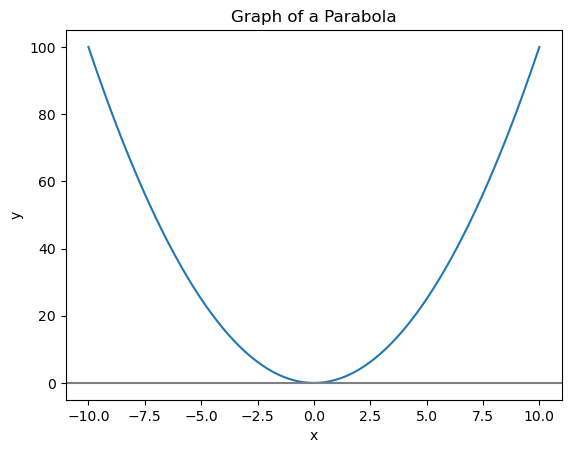

In [34]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of a Parabola')
plt.axhline(0.0,color='grey')
plt.show()

### Another Example:


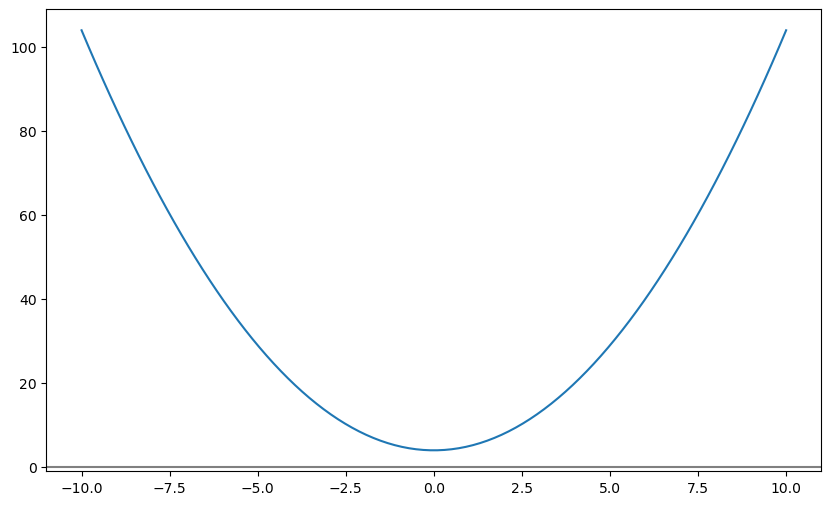

In [36]:
# Range of x values.
x = np.linspace(-10, 10, 100)

# Create figure.
fig, ax = plt.subplots(figsize=(10,6))

# Plot.
ax.plot(x, x**2 + 4)

# Plot x axis.
ax.axhline(0.0, color='grey');

### Quadratic Formula:

The quadratic formula is a formula that can be used to find the roots of a quadratic equation of the form ax^2 + bx + c = 0. A quadratic equation is a polynomial equation of degree 2, which means it has the form:

        ax^2 + bx + c = 0

where a, b, and c are coefficients. The roots of the equation are the values of x that make the equation true.


The quadratic formula allows you to find the roots of a quadratic equation by using the coefficients a, b, and c. The formula is given by

x = (-b ± √ (b2 - 4ac) )/2a

Discriminant is: b2 - 4ac

In [3]:
def formula(a, b, c):
    undersqrt = (b**2 - 4 * a * c)**0.5
    return [(-b - undersqrt) / (2 * a), (-b + undersqrt) / (2 * a)]

In [4]:
# y = x^2
formula(2, 0, 0)

[0.0, 0.0]

In [42]:
# y = x^2 - 4
formula(3, 0, -7)

[-1.5275252316519465, 1.5275252316519465]

In [5]:
# y = x^2 + 4
formula(3, 0, 7)

[(-9.353394427796878e-17-1.5275252316519465j),
 (9.353394427796878e-17+1.5275252316519465j)]

### Fourier Transform:

Fourier transform: a mathematical function that is composed from waveform, which is a function of time(usually), into the frequencies that make it up. The result produced by the Fourier transform is a complex valued function of frequency. This is practically used in signal interperatation and has a multitude of uses.

Fast Fourier Transforms API Reference:  
    https://docs.scipy.org/doc/scipy/tutorial/fft.html#d-discrete-fourier-transforms

In [10]:
# Numerical arrays.
import numpy as np

# Fast Fourier transform.
import scipy.fft as fft

In [14]:
# Create aa array
x = np.array([1.0, -2.5, 2.0, 1.0, 1.5])
x

array([ 1. , -2.5,  2. ,  1. ,  1.5])

In [15]:
# Apply the fast Fourier transform to x.
y = fft.fft(x)
y

array([ 3.        -0.j        , -1.73606798+3.21644081j,
        2.73606798+3.30219753j,  2.73606798-3.30219753j,
       -1.73606798-3.21644081j])

### Inverse Fourier Transform:

We can work back up the same mathemathical functions we used originally to get back to out original result:

In [23]:
# Invert previous Fourier transform result
yinv = fft.ifft(y)
yinv

array([ 1. +0.j, -2.5+0.j,  2. +0.j,  1. +0.j,  1.5+0.j])

In [17]:
# Are x and yinv equal?
x == yinv

array([ True,  True,  True, False,  True])

The fourth value seems to not be equal in this case, however if we examine this further we see that this is a limitation of our code:

In [18]:
x[0]


1.0

In [19]:
yinv[0]

(1+0j)

In [20]:
# Adapted from: https://stackoverflow.com/a/39758154
np.isclose(x, yinv)

array([ True,  True,  True,  True,  True])

### Example (Scipy):

Link to Scipy documentation for example:  
    https://docs.scipy.org/doc/scipy/tutorial/fft.html

In [24]:
import scipy

import matplotlib.pyplot as plt

In [25]:
# Number of samples.
N = 200

# Spacing between samples.
T = 1.0 / 800.0

# Range of x (input) values.
x = np.linspace(0.0, N*T, N, endpoint=False)
x

array([0.     , 0.00125, 0.0025 , 0.00375, 0.005  , 0.00625, 0.0075 ,
       0.00875, 0.01   , 0.01125, 0.0125 , 0.01375, 0.015  , 0.01625,
       0.0175 , 0.01875, 0.02   , 0.02125, 0.0225 , 0.02375, 0.025  ,
       0.02625, 0.0275 , 0.02875, 0.03   , 0.03125, 0.0325 , 0.03375,
       0.035  , 0.03625, 0.0375 , 0.03875, 0.04   , 0.04125, 0.0425 ,
       0.04375, 0.045  , 0.04625, 0.0475 , 0.04875, 0.05   , 0.05125,
       0.0525 , 0.05375, 0.055  , 0.05625, 0.0575 , 0.05875, 0.06   ,
       0.06125, 0.0625 , 0.06375, 0.065  , 0.06625, 0.0675 , 0.06875,
       0.07   , 0.07125, 0.0725 , 0.07375, 0.075  , 0.07625, 0.0775 ,
       0.07875, 0.08   , 0.08125, 0.0825 , 0.08375, 0.085  , 0.08625,
       0.0875 , 0.08875, 0.09   , 0.09125, 0.0925 , 0.09375, 0.095  ,
       0.09625, 0.0975 , 0.09875, 0.1    , 0.10125, 0.1025 , 0.10375,
       0.105  , 0.10625, 0.1075 , 0.10875, 0.11   , 0.11125, 0.1125 ,
       0.11375, 0.115  , 0.11625, 0.1175 , 0.11875, 0.12   , 0.12125,
       0.1225 , 0.12

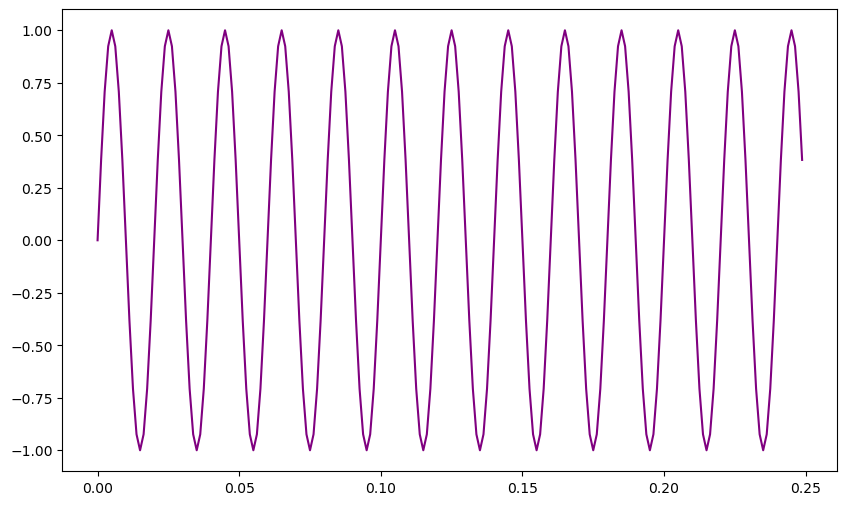

In [33]:
# First sine wave.
y_0 = np.sin(50.0 * 2.0 * np.pi * x)

# Plot First wave.
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y_0, color="purple");


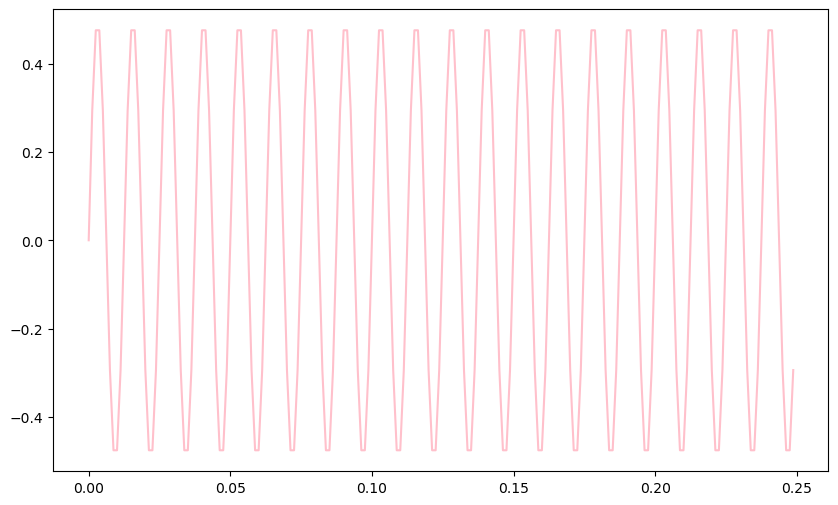

In [31]:
# Second sine wave.
y_1 =  0.5 * np.sin(80.0 * 2.0 * np.pi * x)

# Plot Second Wave.
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y_1, color="pink");

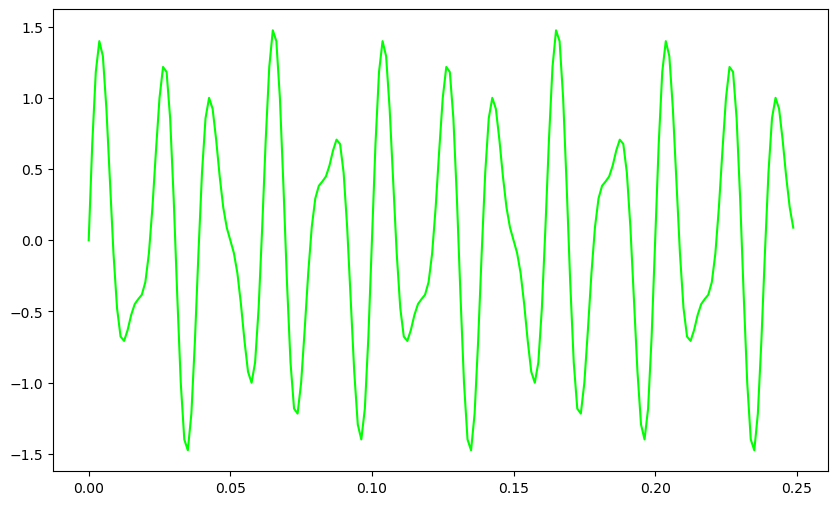

In [30]:
# Sum both Waves.
y = y_0 + y_1

# Plot Sum.
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, color="lime");

In [37]:
# Fast Fourier transform(Y transform).
yf = scipy.fft.fft(y)

# Frequencies (Y Frequencies).
xf = scipy.fft.fftfreq(N, T)[:N//2]

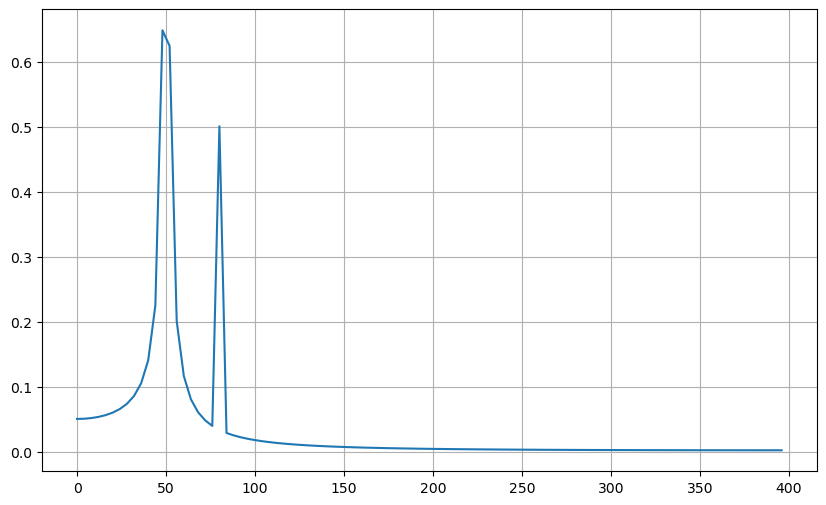

In [39]:
y_1 =  0.5 * np.sin(80.0 * 2.0 * np.pi * x)

# Plot Frequencies 
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid();

In [41]:
np.abs(2 + 3j)

3.605551275463989

In [43]:
np.sqrt(2**3 + 2**3)

4.0

In [44]:
np.sqrt((4+1j)*(4-1j))

(4.123105625617661+0j)